# The first part of the assignment, IDS 2020-2021
In this Jupiter notebook, please, document your results and the way you have obtained them. Please use the _Python environment_ provided at the beginning of the course. In addition to the _Jupiter notebook_, please submit _one zip-file_ containing all datasets and other outputs you have generated (such as pdf, jpg, and others). Please make sure that the datasets and other outputs are easily identifiable, i.e. use names as requested in the corresponding question.

This is the _only_ submission that is required (Jupiter notebook + zip-file). A separate report is _not_ needed and will not be considered for grading. 

Give your commented Python code and answers in the corresponding provided cells. Make sure to answer all questions in a clear and explicit manner and discuss your outputs. _Please do not change the general structure of this notebook_. You can, however, add additional markdown or code cells if necessary. <b>Please DO NOT CLEAR THE OUTPUT of the notebook you are submitting! </b>

<font color="red"> *Please make sure to include names and matriculation numbers of all group members in the slot provided below.* </font> If a name or a student id is missing, the student will not receive any points.

Hint 1: While working on the assignment, you will get a better understanding of the dataset. Feel free to generate additional results and visualizations to support your answers. For example, this might be useful regarding data modification and simplification. <font color="red">Ensure that all your claims are supported.</font>

Hint 2: <font color="red">Plan your time wisely. </font> A few parts of this assignment might take some time to run. It might be necessary to consider time management when you plan your group work.

Hint 3: RWTHmoodle allows multiple submissions, with every new submission overwriting the previous one. <b>Partial submissions are therefore possible and encouraged. </b> This might be helpful in case of technical issues with RWTHMoodle, which may occur close to the deadline.


<font color="red"><b>Student Names and IDs:
    
    
    3. Ningyuan Chen 350169

## Preprocessing of the Dataset (5 points)
 Carry out the following preprocessing steps before starting the analysis:
 - Select 90% of dataset provided for this assignment by random sampling.
     - Use one of the group member's student numbers as a seed.
     - Rename the new generated dataset (which contains 90% of the data) to "sampled_data".
 - <font color='red'>Important!</font>  Export your *sampled_data* dataset and submit it with your assignment solution.
 - If it is not otherwise mentioned, you should always use your below created *sampled_data* as input for the questions.

In [39]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

# read the csv file and construct the dataframe with first row as header
raw_dataset = pd.read_csv(r'./dataset.csv', header=0)
# construct a random state with seed of my id
random_state = np.random.RandomState(350169)
# select 90%
sampled_data = raw_dataset.sample(frac=0.9, random_state=random_state)
# export to file
sampled_data.to_csv(r'./sampled_data.csv')

## Question 1 - Insights into the Data (15 points):

   (a)  Generate a dataset by removing those rows of the sampled_data dataset for which the value of "SurfaceR" is equal or bigger than 50000. Let's call this data set "new_sampled_data".

In [42]:
new_sampled_data = sampled_data[sampled_data['SurfaceR'] < 50000]
new_sampled_data['SurfaceR'].describe()

count      164.000000
mean      3576.402439
std       7344.297307
min         30.000000
25%        300.000000
50%        600.000000
75%       2700.000000
max      40000.000000
Name: SurfaceR, dtype: float64

   (b)  Use a boxplot to find and remove the outliers from "SurfaceR". Note that based on the boxplot the values greater than the upper-whisker and lower than the lower-whisker are considered as outliers. Let's call the dataset after removing the outliers "cleaned_data". Now you should  have three datasets (sampled_data, new_sampled_data, and cleaned_data). 

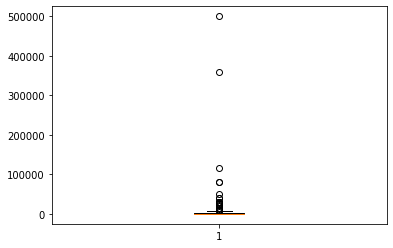

In [3]:
# boxplot it, but seems not very clear
# Question: use sampled_data
import matplotlib.pyplot as plt
plt.boxplot(sampled_data['SurfaceR'])
plt.show()

# calculate the upper-whisker and lower-whisker
Q1 = np.percentile(sampled_data['SurfaceR'], 25, interpolation = 'midpoint')
Q3 = np.percentile(sampled_data['SurfaceR'], 75, interpolation = 'midpoint')
IQR = Q3 -Q1
upper_whisker = Q3 + 1.5*IQR
lower_whisker = Q1 - 1.5*IQR
cleaned_data = sampled_data[sampled_data['SurfaceR'] < upper_whisker]
cleaned_data = cleaned_data[cleaned_data['SurfaceR'] > lower_whisker]

   (c) Compare basic statistical features of "SurfaceR" (median, mean, and mode, standard deviation, variance) in the new_sampled_data and cleaned_data datasets.    Interpret the differences for these statistical values between the cleaned_data and new_sampled_data datasets. Explain why the statistics of these two datasets are different.

In [8]:
_median = np.median(new_sampled_data['SurfaceR'])
_mean = np.mean(new_sampled_data['SurfaceR'])
import statistics
_mode = statistics.mode(new_sampled_data['SurfaceR'])
_std = np.std(new_sampled_data['SurfaceR'])
_var = np.var(new_sampled_data['SurfaceR'])
print("median: %f\nmean: %f\nmode: %f\nstd: %f\nvar: %f" % (_median, _mean, _mode, _std, _var))

median: 600.000000
mean: 3576.402439
mode: 300.000000
std: 7321.871919
var: 53609808.399018


In [9]:
_median = np.median(cleaned_data['SurfaceR'])
_mean = np.mean(cleaned_data['SurfaceR'])
_mode = statistics.mode(cleaned_data['SurfaceR'])
_std = np.std(cleaned_data['SurfaceR'])
_var = np.var(cleaned_data['SurfaceR'])
print("median: %f\nmean: %f\nmode: %f\nstd: %f\nvar: %f" % (_median, _mean, _mode, _std, _var))

median: 500.000000
mean: 1395.753425
mode: 300.000000
std: 1839.551701
var: 3383950.459749


!TODO
<font color = "green"> Explanation: While no data points below the lower whisker are removed, 28 data points above the upper whisker are removed. Furthermore, the maximum value of SurfaceR for the outliers greatly exceeds the upper whisker (40,000 vs 5,000). Therefore, the **mean** and **median** are higher for new_sampled_data than for cleaned data. Furthermore, removing the outliers decreases the overall range the data points lie in. Therefore, the **variance** (and consequently, the **standard deviation**) is higher for new_sampled_data than for cleaned_data. Lastly, the **mode** describes the most common value. This value is more likely to lie in a region where a lot of data points lie, i.e. not in the region of outliers. Therefore, the **mode** is not affected by removing outliers and stays the same for both new_sampled_data and cleaned_data. </font>

### Basic Visualization (10 points)
(d) Visualize mean and median of "SurfaceR" in the cleaned dataset. Specify the "Surroundings3" values for which the mean and median of "SurfaceR" is maximal and for which it is minimal.

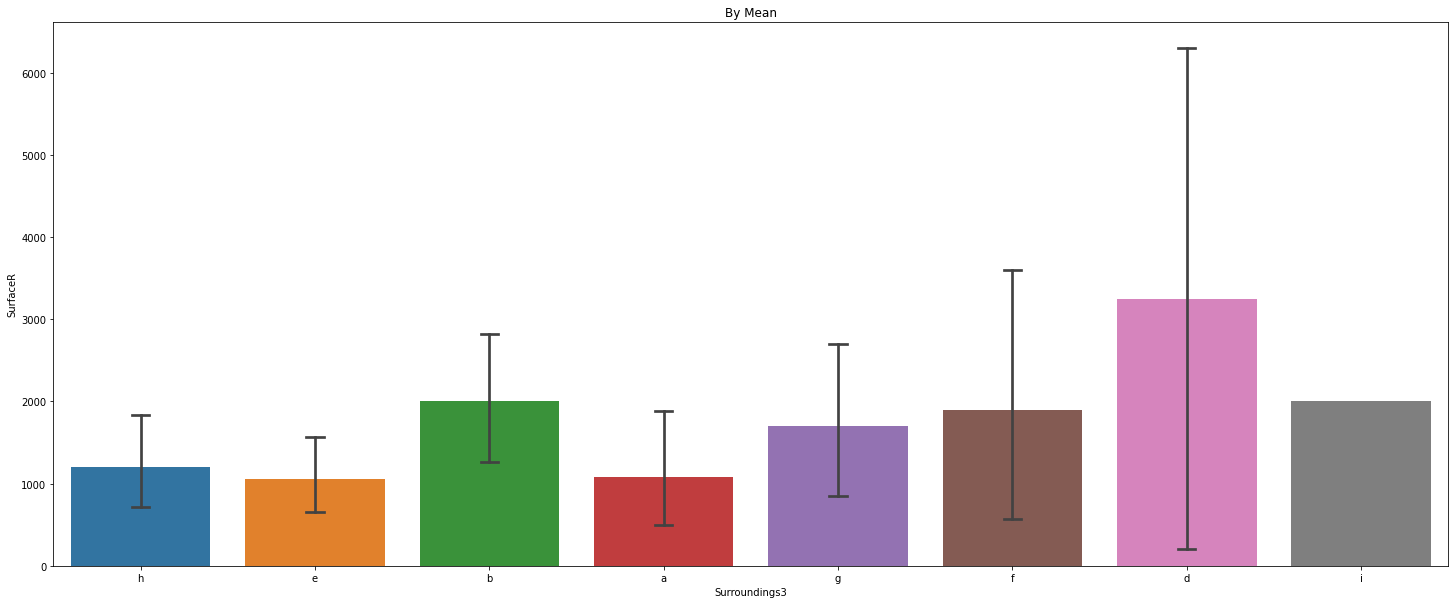

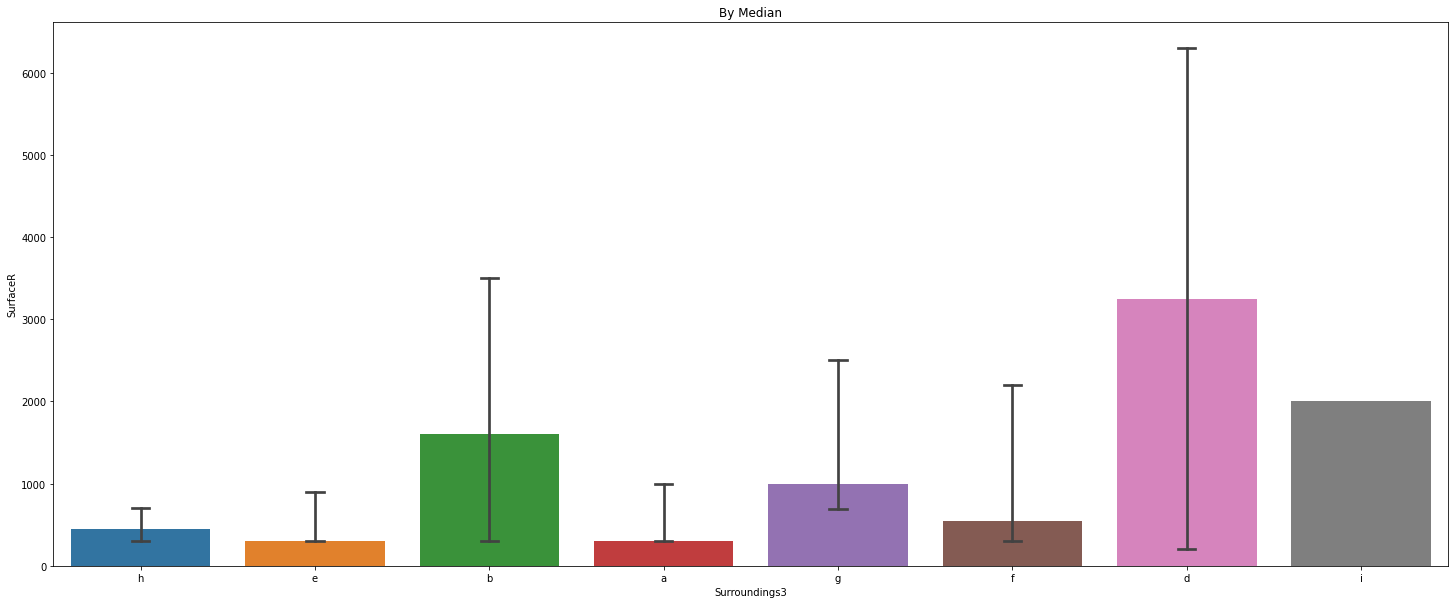

count     146
unique      8
top         e
freq       39
Name: Surroundings3, dtype: object

In [46]:
plt.figure(figsize=(25,10))
sns.barplot(x='Surroundings3', y='SurfaceR', data=cleaned_data[cleaned_data.Surroundings3 != 'None'], estimator=np.mean, capsize=.1)
plt.title("By Mean")
plt.show()
plt.figure(figsize=(25,10))
sns.barplot(x='Surroundings3', y='SurfaceR', data=cleaned_data[cleaned_data.Surroundings3 != 'None'], estimator=np.median, capsize=.1)
plt.title("By Median")
plt.show()

<font color="green">
Explanation: We can visually recognize that the maximum average of both mean and median of SurfaceR is on d, whereas the minimum also for both statistics is on e.</font>

   (e) Plot the distribution of "SurfaceR" in the new_sampled_data and cleaned_data datasets.

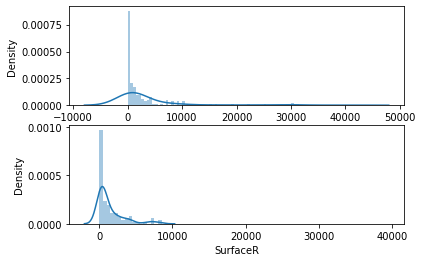

In [49]:
import seaborn as sns
plt.subplot(211)
sns.distplot(new_sampled_data['SurfaceR'], 
             bins=np.arange(start=0, stop=np.max(new_sampled_data['SurfaceR']), step=500))
plt.subplot(212)
# TODO
sns.distplot(cleaned_data['SurfaceR'], 
             bins=np.arange(start=0, stop=np.max(new_sampled_data['SurfaceR']), step=500))
plt.show()

   (f) Explore the distribution of "SurfaceR" and "AcessR" together in the new_sampled_data and cleaned_data datasets. Specify the ranges of "SurfaceR" and "AcessR" for which the frequency of the data is the highest.

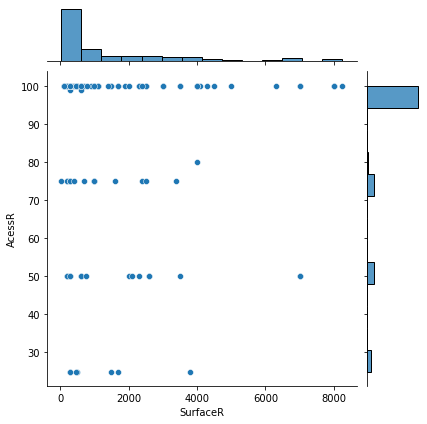

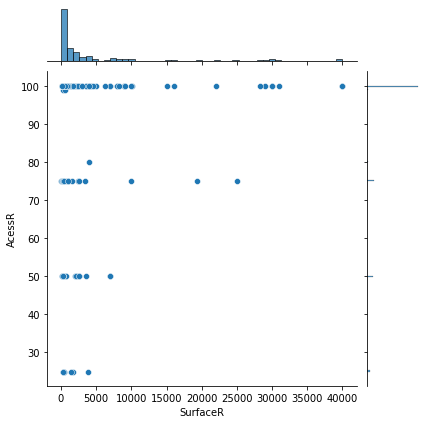

In [51]:
sns.jointplot(x='SurfaceR', y='AcessR', data=cleaned_data, kind="scatter");
sns.jointplot(x='SurfaceR', y='AcessR', data=new_sampled_data, kind="scatter");

Explanation:

For both datasets, the highest frequency happens when AcessR=100 and SurfaceR=0.

## Question 2 - Decision Trees (15 points):

   (a) Add a categorical column "number_frogs" to the new_sampled_data which indicate the number of different frogs in each region (row). For example, if in a row we have:
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 0, "Common newt" = 0, and "Great crested newt" = 0, then "number_frogs" = 'two'.
       - "Green frogs" = 1, "Brown frogs" = 1, "Common toad" = 0, "Fire-bellied toad" = 0, "Tree frog" = 1, "Common newt" = 1, and "Great crested newt" = 0, then "number_frogs" = 'four'.

In [85]:
new_sampled_data['number_frogs'] = new_sampled_data.apply(
    lambda row: row['Green frogs']+row['Brown frogs']+row['Common toad']+row['Fire-bellied toad']+
    row['Tree frog']+row['Common newt']+row['Great crested newt'], axis=1)
# check the range of the values
print(new_sampled_data['number_frogs'].unique())
# array([3, 6, 5, 1, 4, 2, 7, 0])
number_to_word = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven']
new_sampled_data['number_frogs'] = new_sampled_data.apply(lambda row: number_to_word[row['number_frogs']], axis=1)
new_sampled_data.head()

[3 6 5 1 4 2 7 0]


ID  SurfaceR  NumberR TypeR  VegetationR Surroundings1 Surroundings2  \
87    88       300        1     i            1             b             h   
80    81       600        2     a            1             a             h   
185  186       300        1     i            2             f             h   
3      4       300        1     d            0             e             h   
62    63     19300        2     a            1             b             e   

    Surroundings3  UseR  FishingR  ...  PollutionR   ShoreR  Green frogs  \
87              h     0         0  ...           0  natural            0   
80              e     3         1  ...           0  natural            1   
185             b     0         0  ...           0  natural            1   
3               b     3         4  ...           0  natural            0   
62              a     3         3  ...           0  natural            1   

     Brown frogs Common toad  Fire-bellied toad  Tree frog  Common newt  \
87             1           1                  0          1            0   
80             1           1                  0          1            1   
185            1           1                  1          0            1   
3              0           1                  0          0            0   
62             1           1                  1          1            0   

     Great crested newt  number_frogs  
87                    0         three  
80                    1           six  
185                   0          five  
3                     0           one  
62                    0          five  

[5 rows x 23 columns]

   (b) In the new dataset (created in Section 'a'), consider "TypeR", "VegetationR", "Surroundings1", "Surroundings2", "Surroundings3" as    the descriptive features and "number_frogs" as the target feature. Generate two decision trees. Let's call them "tree1" and "tree2". In tree1 set the minimum number of samples for splitting to 15 and in tree2 set the minimum number of samples for splitting to 1. Create both decision trees based on entropy.

In [79]:
from p_decision_tree.DecisionTree import DecisionTree
q2_data = new_sampled_data.copy(deep=True)
descriptive_features = ['TypeR','VegetationR', 'Surroundings1', 'Surroundings2', 'Surroundings3']
target_feature = 'number_frogs'

# Convert all the columns to string
q2_str = q2_data.copy()
for column in q2_str.columns:
    q2_str[column]= q2_str[column].astype(str)

df_descriptive = q2_str[descriptive_features].values
df_target = q2_str[target_feature].values

# Decision Tree1
tree1 = DecisionTree(df_descriptive.tolist(), descriptive_features, df_target.tolist(), "entropy")
tree1.id3(0 ,15)

tree2 = DecisionTree(df_descriptive.tolist(), descriptive_features, df_target.tolist(), "entropy")
tree2.id3(0 ,1)

dot1 = tree1.print_visualTree(render=True)
dot2 = tree2.print_visualTree(render=True)
# see the output PDF

   (c) Consider tree1. What is the best attribute (based on entropy) for splitting the tree in the second round of ID3 regarding the value of the attribute chosen in the first round of ID3?    

<font color="red">TODO: Jan</font> 
Explanation: 

   (d) Compare tree1 and tree2 in terms of the possibility of overfitting and the complexity of the decision trees.

<font color="red">TODO: Jan</font> Explanation:

## Question 3 - Regression (14 points):

For this question (Q3), create and use a restricted dataset by removing the columns "ID", "NumberR", "Surrounding1", "Surrounding2", "Surrounding3", "Common toad", "Fire-bellied toad", "Tree frog", "Common newt", "Great crested newt" from the sampled_data.

In this question, we consider "Green frogs" and "Brown frogs" to be potential target features, while all other features are potential descriptive features.

In [78]:
q3_data = sampled_data.drop(
    ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad",
     "Tree frog", "Common newt", "Great crested newt"], axis=1)
target_features = ['Green frogs', 'Brown frogs']
q3_output = q3_data[target_features]
q3_input = q3_data.drop(target_features, axis=1)
q3_input.head(2)

SurfaceR TypeR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  \
87        300     i            1     0         0     100              5   
135    115000     a            0     3         4     100              0   

     BuildingR  PollutionR   ShoreR  
87           5           0  natural  
135          1           0  natural

   (a) Which features are suitable as input for logistic regression? Which would need to be modified first? Explain your answers.

In [57]:
q3_input.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170 entries, 87 to 103
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SurfaceR       170 non-null    int64 
 1   TypeR          170 non-null    object
 2   VegetationR    170 non-null    int64 
 3   UseR           170 non-null    int64 
 4   FishingR       170 non-null    int64 
 5   AcessR         170 non-null    int64 
 6   RoadDistanceR  170 non-null    int64 
 7   BuildingR      170 non-null    int64 
 8   PollutionR     170 non-null    int64 
 9   ShoreR         170 non-null    object
dtypes: int64(8), object(2)
memory usage: 14.6+ KB


Explanation: "SurfaceR", "VegetationR", "UseR", "FishingR", "AcessR", "RoadDistanceR", "BuildingR", "PollutionR" are suitable as input for logistic regression as they either interval, ratio, or ordinal. "TypeR", "ShoreR" can be mapped to numeric values.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows. 

Explanation: Convert categorical variable into indicator variables.

In [81]:
# define descriptive features and convert categorical variable into indicator variables
q3_input_mod = pd.get_dummies(q3_input)
q3_input_mod.head(2)

SurfaceR  VegetationR  UseR  FishingR  AcessR  RoadDistanceR  BuildingR  \
87        300            1     0         0     100              5          5   
135    115000            0     3         4     100              0          1   

     PollutionR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  TypeR_h  \
87            0        0        0        0        0        0        0   
135           0        1        0        0        0        0        0   

     TypeR_i  TypeR_j  ShoreR_concrete  ShoreR_natural  
87         1        0                0               1  
135        0        0                0               1

(c) We want to predict the presence of green frogs and brown frogs in the habitat, using a distinct logistic regression classifier for each frog type. 

Consider the set of features available in this question's unmodified data set (that is before Q3b). To get an overview of the data, choose and present some basic visualization as discussed in the lectures (e.g.  scatter matrix, scatter plots, charts, etc.). Based on this visualization, for each frog type choose the 4 most promising descriptive features to predict the presence of that frog type in the habitat. 

Explain your strategy and choices.

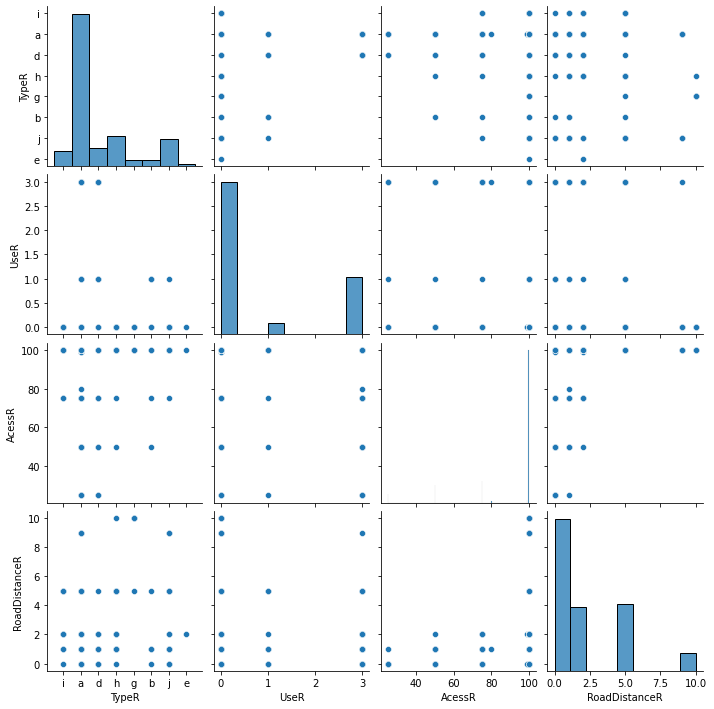

In [35]:
sns.pairplot(q3_data, vars=['TypeR', 'UseR', 'AcessR', 'RoadDistanceR'])
plt.show()
# TODO need some useful plot

Explanation: 

   (d) For both frog types, train a logistic regression classifier to predict the presence of that frog type in the habitat. Use the descriptive features as chosen in Q3c. Apply the modification from Q3b if needed.

In [60]:
from sklearn.linear_model import LogisticRegression

# TODO modify needed
reg_green = LogisticRegression(random_state=random_state).fit(q3_input_mod, q3_output['Green frogs'])
print('Accuracy of green frogs regression:', reg_green.score(q3_input_mod, _y['Green frogs']))
reg_brown = LogisticRegression(random_state=random_state).fit(q3_input_mod, q3_output['Brown frogs'])
print('Accuracy of brown frogs regression:', reg_green.score(q3_input_mod, q3_output['Brown frogs']))

green frogs regression: 0.7529411764705882
brown frogs regression: 0.5823529411764706


   (e) For each of the two trained classifiers compute and print the confusion matrix.

In [31]:
from sklearn.metrics import confusion_matrix

q3_predict_green = reg_green.predict(q3_input_mod)
print('confusion matrix of green frogs:\n', confusion_matrix(q3_output['Green frogs'], q3_predict_green))
q3_predict_brown = reg_brown.predict(q3_input_mod)
print('confusion matrix of brown frogs:\n', confusion_matrix(q3_output['Brown frogs'], q3_predict_brown))

confusion matrix of green frogs:
 [[47 23]
 [19 81]]
confusion matrix of brown frogs:
 [[  0  39]
 [  0 131]]


(f) Based on the information computed in Q3 so far, interpret and evaluate the two models and compare them. Why are they similar/different? Would you recommend the models and why (not)? How do you think the applied methods could be improved to get better results?

Explanation: TODO

## Question 4 - Support Vector Machines (8 points):

For this question (Q4), restrict your data set to the same features as in Q3. Similar to Q3, we want to train two distinct classifiers predicting the presence of green frogs and brown frogs in the habitat. 

In this question, we will use SVMs instead of logistic regression. In the following, consider *Green frogs* and *Brown frogs* to be potential target features, while all other features are potential descriptive features.

In [32]:
q4_data = sampled_data.drop(
    ["ID", "NumberR", "Surroundings1", "Surroundings2", "Surroundings3", "Common toad", "Fire-bellied toad",
     "Tree frog", "Common newt", "Great crested newt"], axis=1)

_y4 = q3_data[target_features]
_X4 = q3_data.drop(target_features, axis=1)

   (a) Which of the potential descriptive features are suitable as an input for SVMs and which need to be modified first? Modify the data as needed and provide a brief explanation. Print the first two data rows of the modified data set.

In [38]:
_X4_mod = pd.get_dummies(_X4[['TypeR', 'UseR', 'AcessR', 'RoadDistanceR']])
_X4_mod.head(2)

UseR  AcessR  RoadDistanceR  TypeR_a  TypeR_b  TypeR_d  TypeR_e  TypeR_g  \
87      0     100              5        0        0        0        0        0   
135     3     100              0        1        0        0        0        0   

     TypeR_h  TypeR_i  TypeR_j  
87         0        1        0  
135        0        0        0

Explanation:

   (b) For each frog type, consider the same set of 4 descriptive features as chosen in Q3 c). Generate for both target features a training and test set based on all data rows (for example, consider the sampling strategies as explained in the lecture) of the restricted data set. Briefly explain and motivate the choice of the sampling strategy as well as the size of the training and test set.

In [ ]:
# TODO need to decide

Explanation:

   (c) Use the training set to train 4 different SVMs (2 per frog type) with different parameter combinations. Use at least two distinct values for the parameters *kernel* and *C*.

*Hint: depending on the size of the training data and chosen parameters, training the SVMs may take some time.*

In [ ]:
# TODO need to decide

   (d) Compute and print the mean accuracy and the classification report of the trained SVMs with respect to the test set (see instruction for examples).

   (e) Based on the information computed in Q4 so far, interpret and evaluate the 4 SVMs and compare them. Why are they similar/different? Would you recommend using these SVMs and why (not)?

Explanation:


## Question 5 - Neural Networks (15 points)
In this question consider the sampled_data, which is the dataset that you have created in the *Preprocessing of Dataset* section. The target features are the *different frogs*.

   (a) What are the possible inputs of your network?
   
     - Give the number of possible values of the different categorical inputs.
     - Give the number of possible input patterns for the categorical data..

In [73]:
cat_features = ['TypeR', 'Surroundings1', 'Surroundings2', 'Surroundings3', 'ShoreR']
for cat_feature in cat_features:
    _len = len(q7_data[cat_feature].unique())
    print('The number of possible values of', cat_feature, _len)
    print('The number of possible input patterns for', cat_feature, pow(2, _len))

The number of possible values of TypeR 8
The number of possible input patterns for TypeR 256
The number of possible values of Surroundings1 8
The number of possible input patterns for Surroundings1 256
The number of possible values of Surroundings2 7
The number of possible input patterns for Surroundings2 128
The number of possible values of Surroundings3 8
The number of possible input patterns for Surroundings3 256
The number of possible values of ShoreR 2
The number of possible input patterns for ShoreR 4


Explanation: 
The possible inputs are "SurfaceR", "NumberR, "VegetationR", "UseR", "FishingR", "AcessR", "RoadDistanceR", "BuildingR", "PollutionR" and category encoded "TypeR", "Surroundings1", "Surroundings2", "Surroundings3", "ShoreR".

   (b) Choose one categorical feature and two non-categorical features as input features. Create a data set with those features and the target columns (different frogs). Name this data set *NN_data*.

In [19]:
# choose TypeR, VegetationR, NumberR, 
NN_data = sampled_data[['TypeR', 'VegetationR', 'NumberR', 'Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']]

            SurfaceR     NumberR  VegetationR        UseR    FishingR  \
count     170.000000  170.000000   170.000000  170.000000  170.000000   
mean    10420.764706    1.600000     1.917647    0.829412    0.852941   
std     48684.103003    1.615018     1.325327    1.305548    1.357259   
min        30.000000    1.000000     0.000000    0.000000    0.000000   
25%       300.000000    1.000000     1.000000    0.000000    0.000000   
50%       725.000000    1.000000     2.000000    0.000000    0.000000   
75%      3500.000000    1.000000     3.000000    3.000000    1.750000   
max    500000.000000   12.000000     4.000000    3.000000    4.000000   

           AcessR  RoadDistanceR   BuildingR  PollutionR  
count  170.000000     170.000000  170.000000  170.000000  
mean    89.723529       2.358824    2.576471    0.052941  
std     20.435207       2.526911    2.712568    0.312686  
min     25.000000       0.000000    0.000000    0.000000  
25%     99.250000       1.000000    1.000000   

   (c) Convert the features that need to be converted using One-Hot-Encoding. Explain why you need (not) to convert these features. Name the data set *NN_data_encoded*.

Explanation:

In [20]:
NN_data_encoded = pd.get_dummies(NN_data)
NN_data_encoded.head()

     VegetationR  NumberR  Green frogs  Brown frogs  Common toad  \
87             1        1            0            1            1   
135            0        5            1            1            0   
80             1        2            1            1            1   
185            2        1            1            1            1   
3              0        1            0            0            1   
..           ...      ...          ...          ...          ...   
72             2        1            0            0            1   
144            3        1            1            1            0   
158            2        1            1            1            1   
66             4        1            0            1            0   
103            4       10            1            1            1   

     Fire-bellied toad  Tree frog  Common newt  Great crested newt  TypeR_a  \
87                   0          1            0                   0        0   
135                  0   

   (d) Create a training and test set with 90% of the rows of your *NN_data_encoded* data set for training and 10% as test data set. Name them *train_NN* and *test_NN*

In [21]:
from sklearn.model_selection import train_test_split
NN_data_encoded = pd.get_dummies(NN_data)
targets = ['Green frogs', 'Brown frogs', 'Common toad', 'Fire-bellied toad', 'Tree frog', 'Common newt', 'Great crested newt']
X_train, X_test, y_train, y_test = train_test_split(
    NN_data_encoded.drop(targets, axis=1), 
    NN_data_encoded[targets], test_size=0.1, random_state=random_state)
train_NN = pd.concat([X_train, y_train], axis=1)
test_NN = pd.concat([X_test, y_test], axis=1)
print(train_NN.info())
print(test_NN.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 151 to 178
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   VegetationR         153 non-null    int64
 1   NumberR             153 non-null    int64
 2   TypeR_a             153 non-null    uint8
 3   TypeR_b             153 non-null    uint8
 4   TypeR_d             153 non-null    uint8
 5   TypeR_e             153 non-null    uint8
 6   TypeR_g             153 non-null    uint8
 7   TypeR_h             153 non-null    uint8
 8   TypeR_i             153 non-null    uint8
 9   TypeR_j             153 non-null    uint8
 10  Green frogs         153 non-null    int64
 11  Brown frogs         153 non-null    int64
 12  Common toad         153 non-null    int64
 13  Fire-bellied toad   153 non-null    int64
 14  Tree frog           153 non-null    int64
 15  Common newt         153 non-null    int64
 16  Great crested newt  153 non-null    int64


   (e) Train two different Neural Networks, one with a linear activation function and one with a non-linear activation function. All other settings stay default. Give the accuracy of each Neural Network for the training and test set (*train_NN* and *test_NN*. Which activation function seems to be better?

In [76]:
# (linear activation function):
# TODO need to decide

In [77]:
#  (non-linear activation function):
# TODO need to decide

Explanation: The one with non-linear activation function seems to be better.

   (f) Based on your result of (e) train 2 more Neural Networks with different settings (change at least 4 parameters (2 each)). Explain your parameters and the choice of the activation function. Evaluate the different Neural Networks with your test set by giving the accuracy. Try to increase the accuracy and analyse the factors that prohibit better accuracy.

In [ ]:
# how to choose the features?

Explanation:

## Question 6 - Evaluation (10 Points)

   (a) Consider two models of question 5 of your choice with the respective datasets (training and test data).

- Create training and test data for 3-fold cross validation.

In [84]:
from sklearn.model_selection import KFold
kf3 = KFold(n_splits=3, random_state=random_state, shuffle=True)
q6_input = NN_data_encoded.drop(targets, axis=1)
q6_output = NN_data_encoded[targets]

kf3_train_index = []
kf3_test_index = []
for train_index, test_index in kf3.split(q6_input):
    kf3_train_index.append(train_index)
    kf3_test_index.append(test_index)

# e.g. first fold data set for train and test:
X.iloc[kf3_train_index[0]].head(2)
y.iloc[kf3_train_index[0]].head(2)
X.iloc[kf3_test_index[0]].head(2)
y.iloc[kf3_test_index[0]].head(2)

Green frogs  Brown frogs  Common toad  Fire-bellied toad  Tree frog  \
87             0            1            1                  0          1   
135            1            1            0                  0          0   

     Common newt  Great crested newt  
87             0                   0  
135            0                   0

- Print confusion matrices on the training data and the cell-by-cell summation of the results.

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix()

- Print the cell-by-cell summation of the confusion matrices on the test data.

In [ ]:
# Your code for the confusion matrices on the test data

- Print the precision, recall and f1-scores on the test data for each fold and model. Give the unaggregated results.

In [ ]:
# Your code for precision, recall and F1-scores on the test data

- Compute accuracy scores on training and test data (give explicitly the result for each fold).

In [ ]:
# Your code for accuracy scores on training and test data

In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the **questions 2 through 5** of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the findings above.

Explanation:

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the findings above.

Explanation:

## Question 7 - Clustering (8 points): 

(a) For this question, use the extracted data set you created in the preprocessing step (sampled_data). Drop all the columns expect "VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", and "PollutionR". Use a dendogram to find the overview of the clusters that you can extract for the remaining columns.

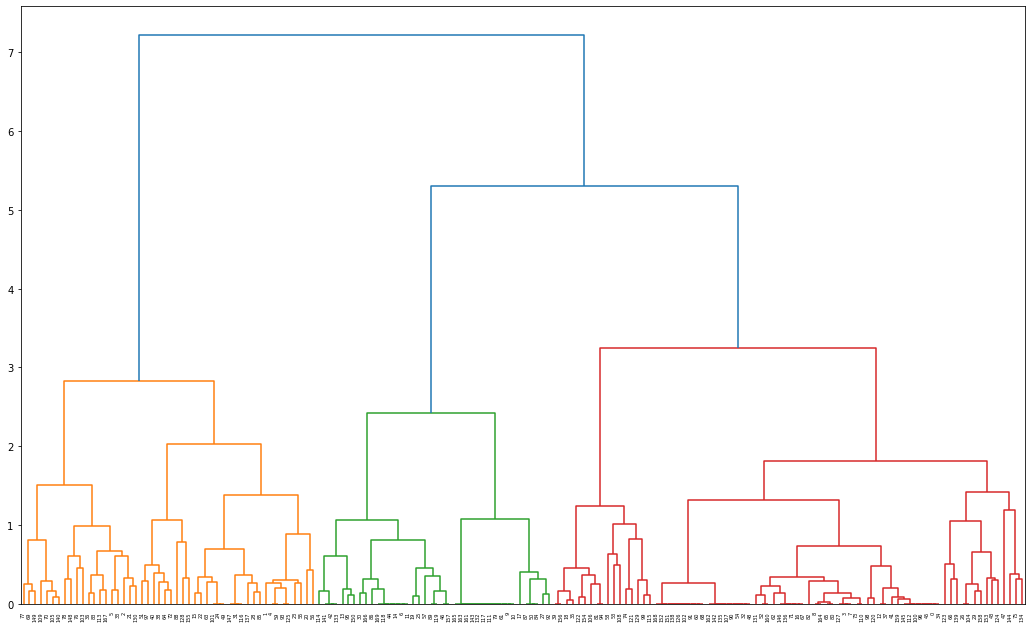

In [118]:
from sklearn import preprocessing
from scipy.cluster import hierarchy

q7_data = sampled_data[
    ["VegetationR", "UseR", "FishingR", "RoadDistanceR", "BuildingR", "RoadDistanceR", "PollutionR"]]

q7_data_scaled = preprocessing.normalize(q7_data)
q7_data_processed = pd.DataFrame(q7_data_scaled, columns=q7_data.columns)
plt.figure(figsize=(18, 11))
# TODO which method?
Z = hierarchy.linkage(q7_data_processed, 'ward')
dn = hierarchy.dendrogram(Z)
plt.show()

(b) What does the vertical and horizontal axis show in the dendogram? Why the distance between the clusters in the dendogram generally decreases, when we go from top to down in the dendogram?

Solution: TODO

* The vertical aixs shows a measure of closeness of either individual data points or clusters.
* The horizontal axis shows the features?

(c) Split the diagram at 3 and find the number the clusters at this point.

The number of the clusters at 3: 4


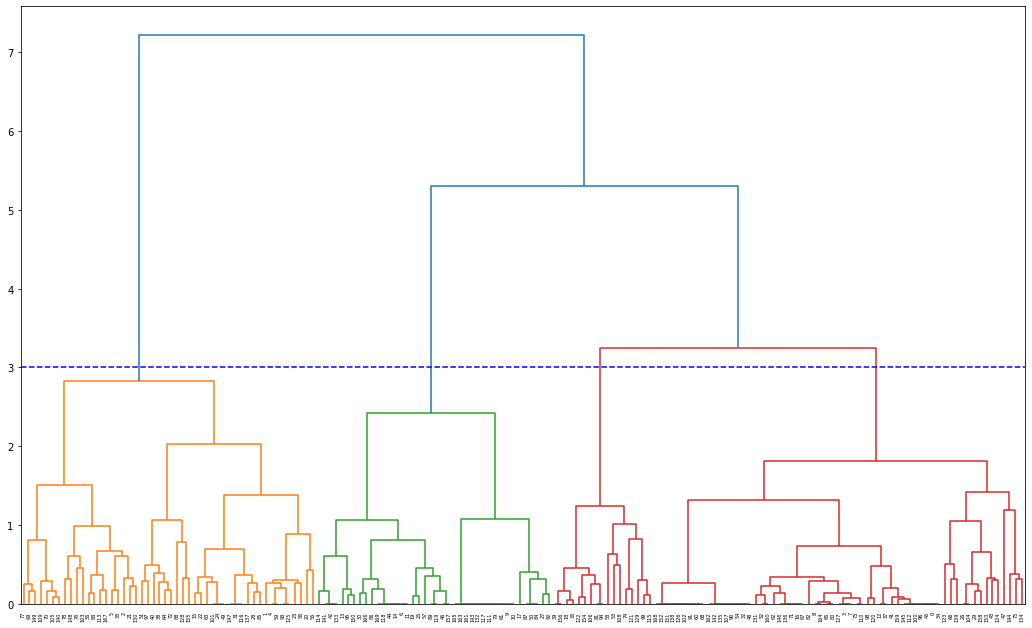

In [125]:
plt.figure(figsize=(18, 11))
Z = hierarchy.linkage(q7_data_processed, 'ward')
dn = hierarchy.dendrogram(Z)
plt.axhline(y=3, color='b', linestyle='--')
plt.show()

print('The number of the clusters at 3:', max(hierarchy.fcluster(Z, 3, 'distance')))

(d) Using agglomerative clustering with the number of clusters found in the previous section and a scatter diagram, show the discovered cluster for "VegetationR" and "UseR" in different colors. 

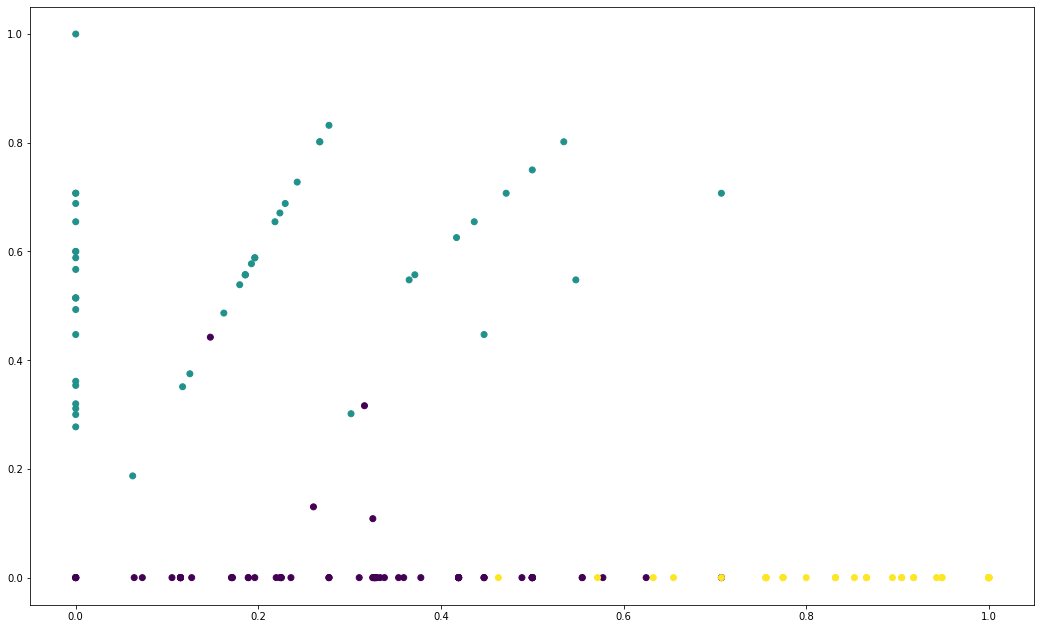

In [126]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
cluster.fit_predict(q7_data_processed)

plt.figure(figsize=(18, 11))
plt.scatter(q7_data_processed['VegetationR'], q7_data_processed['UseR'], c=cluster.labels_)
plt.show()